# Proyecto Mineria de Datos

Importar librerias básicas para el funcionamiento del proyecto:
    

In [1]:
import pandas as pd # para obtener la informacion del archivo csv
import matplotlib.pyplot as plt

%matplotlib inline

Leer archivo con informacion para la generación del dataset:

In [2]:
cervicalCancer = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
cervicalCancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.00,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.00,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.40,0.0,0.00,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.80,0.0,0.00,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
cervicalCancer.shape

(858, 36)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001991DE6F1D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001991E98DC18>]], dtype=object)

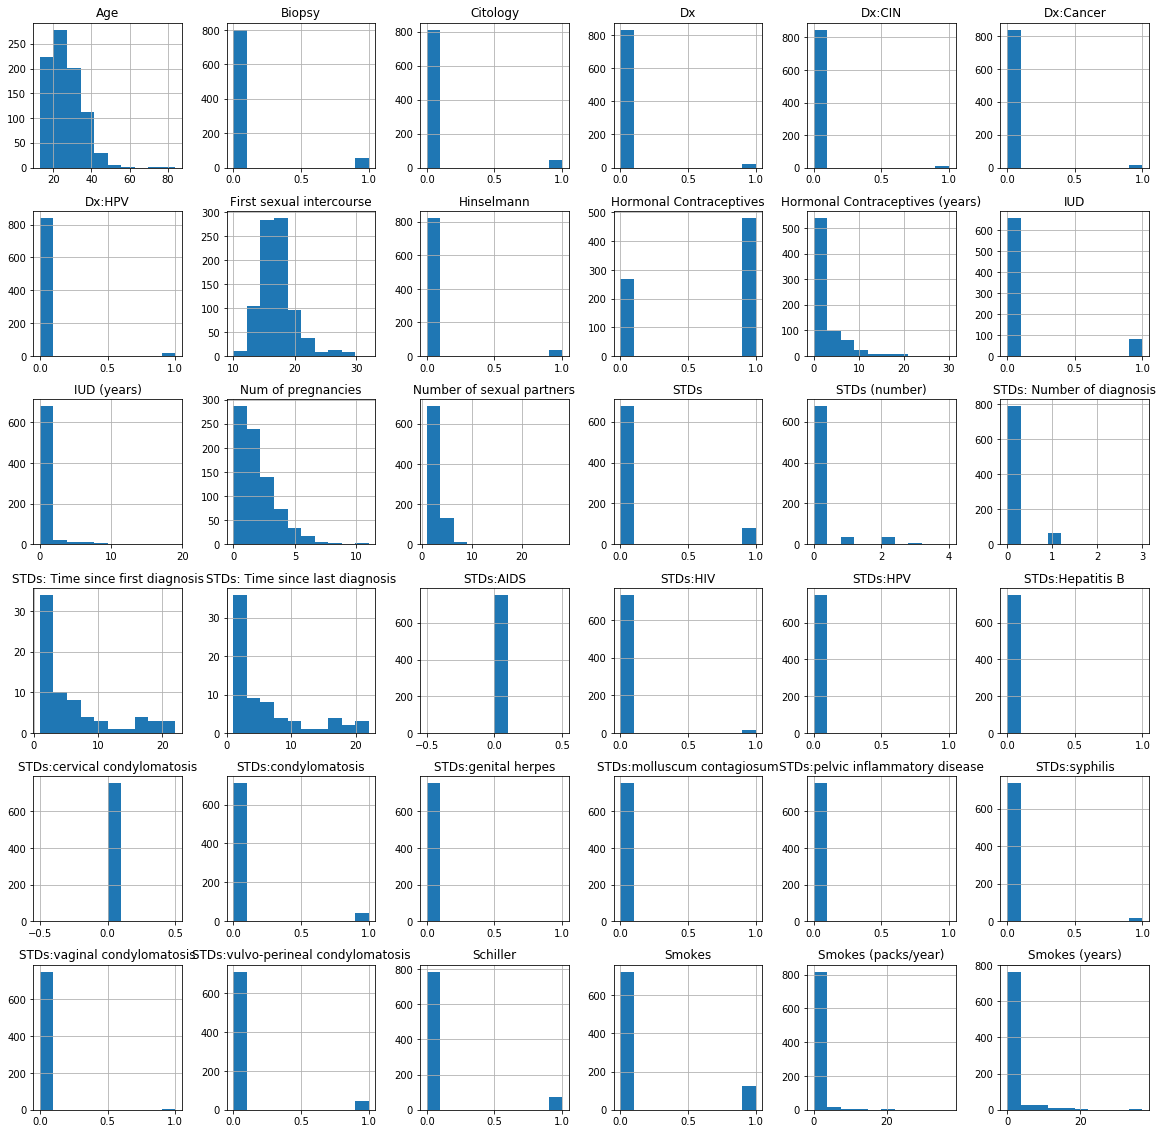

In [4]:
cervicalCancer.hist(figsize=(20,20))

## Preprocesamiento de los Datos

Para el pre-procesamiento inicial de los datos, se proceden a eliminar los siguientes valores:
* Las fechas de padecimiento de STDs: Por falta de información en estos dos atributos, se eliminan.
* STDs (cervical condylomatosis, molluscum contagiosum, pelvic inflammatory disease, vaginal condylomatosis, genital herpes, Hepatitis B, AIDS, HPV)
    * Se eliminan todas las columnas relacionadas a las enfermedades anteriores, pues de acuerdo al dataset, ninguna de las pacientes padeció estas enfermedades, lo que no da valor a nuestro estudio.

In [5]:
cervicalCancer.drop(['STDs:cervical condylomatosis','STDs:molluscum contagiosum','STDs:pelvic inflammatory disease','STDs:vaginal condylomatosis','STDs:genital herpes','STDs:Hepatitis B','STDs:AIDS','STDs:HPV','STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)

Para los valores faltantes(NaN) se procede a usar la función **fillna** de pandas, bajo el siguiente método:
* bff: usa la siguiente observación valida para llenar el valor faltante.

In [6]:
cervicalCancer.fillna(method='pad',inplace=True)
cervicalCancer.fillna(method='bfill',inplace=True)
#cervicalCancer.dropna(inplace=True, how='any') aquí está quitando todas las series con NaN, no las está cambiando

In [7]:
cervicalCancer.shape

(858, 26)

Confirmemos que no tenemos valores perdidos o nulos en el dataset:

In [8]:
cervicalCancer.isnull().values.any()

False

# Feature selection

Se separan los features de la clase. En nuestro set de datos Biopsy representa si se le hizo biopsia o no a la paciente.

In [9]:
X=cervicalCancer.drop('Biopsy',axis=1)
y=cervicalCancer['Biopsy']
print(X.shape)
print(y.shape)

(858, 25)
(858,)


Por medio de árboles de clasificación se obtiene un ranking de los features con mayor peso.

Feature ranking:
1. feature 23 Schiller (0.341416)
2. feature 22 Hinselmann (0.139735)
3. feature 0 Age (0.075373)
4. feature 2 First sexual intercourse (0.068111)
5. feature 1 Number of sexual partners (0.057915)
6. feature 8 Hormonal Contraceptives (years) (0.053026)
7. feature 24 Citology (0.052313)
8. feature 3 Num of pregnancies (0.051239)
9. feature 5 Smokes (years) (0.017895)
10. feature 7 Hormonal Contraceptives (0.017295)
11. feature 10 IUD (years) (0.016720)
12. feature 6 Smokes (packs/year) (0.014562)
13. feature 9 IUD (0.010432)
14. feature 4 Smokes (0.009912)
15. feature 21 Dx (0.009345)
16. feature 19 Dx:CIN (0.008534)
17. feature 20 Dx:HPV (0.008451)
18. feature 15 STDs:syphilis (0.008243)
19. feature 18 Dx:Cancer (0.008050)
20. feature 17 STDs: Number of diagnosis (0.007599)
21. feature 16 STDs:HIV (0.006381)
22. feature 12 STDs (number) (0.005904)
23. feature 11 STDs (0.005566)
24. feature 14 STDs:vulvo-perineal condylomatosis (0.003262)
25. feature 13 STDs:condylomato

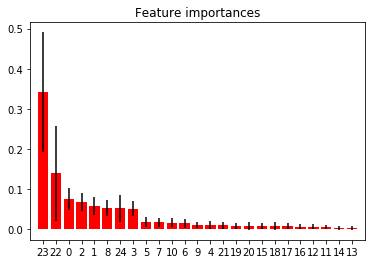

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Se grafica el número de atributos vs el desempeno del clasificador, obteniendo el número óptimo de features.

Optimal number of features : 6


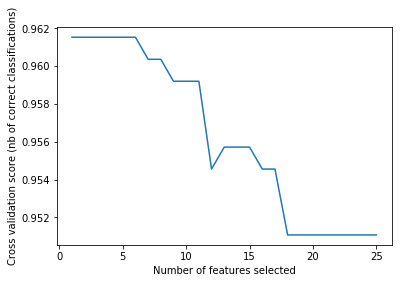

In [11]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X,y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Como método de clasificación inicial, utilizaremos un método no supervisado, por lo que no necesitaremos el nombre de la clase dentro del set de datos.

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)
# datasets=[X_train, X_test, y_train, y_test]
# for i in datasets:
#     print(i.shape)
train, test = train_test_split(cervicalCancer,test_size=0.3, random_state=5)
print (train.shape)
print (test.shape)

## Clasificación No-Supervisada

### k-Means

Se utiliza k-Means como primer método de clasificación, definiendo 2 clusters como limite.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(train)

Se aplica la predicción sobre el conjunto de datos

In [ ]:
k_class_result = kmeans.predict(train)
print(k_class_result)

In [ ]:
plt.scatter(train.values[:, 0], train.values[:, 1], c=k_class_result, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', s=100, linewidth=2)
# for i, txt in enumerate(k_class_result):
#     plt.annotate(i, (train.values[:, 0][i], train.values[:, 1][i]))
#     plt.annotate(txt, (train.values[:, 0][i], train.values[:, 1][i]))

### Test dataset

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(test)
k_class_test_result = kmeans.predict(test)
print(k_class_test_result)
plt.scatter(test.values[:, 0], test.values[:, 1], c=k_class_test_result, s=100)

## Clasificación Supervisada

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4)
datasets=[X_train, X_test, y_train, y_test]
for i in datasets:
    print(i.shape)

In [ ]:
training_acc = []
test_acc = []

depth = range(1, 20)
for d in depth:
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)
    training_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))
            
plt.plot(depth, training_acc, label="training accuracy")
plt.plot(depth, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.legend()

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

training_acc = []
test_acc = []

depth = range(1, 10)
for m in min_samples:
    tree = DecisionTreeClassifier(max_depth=3,min_samples_split=m)
    tree.fit(X_train, y_train)
    training_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))
            
plt.plot(min_samples, training_acc, label="training accuracy")
plt.plot(min_samples, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Min Samples Split")
plt.legend()

tree = DecisionTreeClassifier(max_depth=3,min_samples_split=6)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Ya seleccionamos 2 parametros para estabilizar el modelo y de acuerdo al grafico anterior, se ve estable. Ahora necesitamos seleccionar una tercera variable, para validar el comportamiento que nuestro modelo tiene

In [ ]:
from sklearn.tree import DecisionTreeClassifier

training_acc = []
test_acc = []

random_state_tree = range(1,10)
for r in random_state_tree:
    tree = DecisionTreeClassifier(max_depth=3,min_samples_split=6, random_state=r)
    tree.fit(X_train, y_train)
    training_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))
            
plt.plot(random_state_tree, training_acc, label="training accuracy")
plt.plot(random_state_tree, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Random State Tree")
plt.legend()

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
import numpy as np

n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), list(cervicalCancer))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
    

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(tree, X, y, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

In [ ]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, X, y, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

In [ ]:
X